#**Heart Disease Prediction**

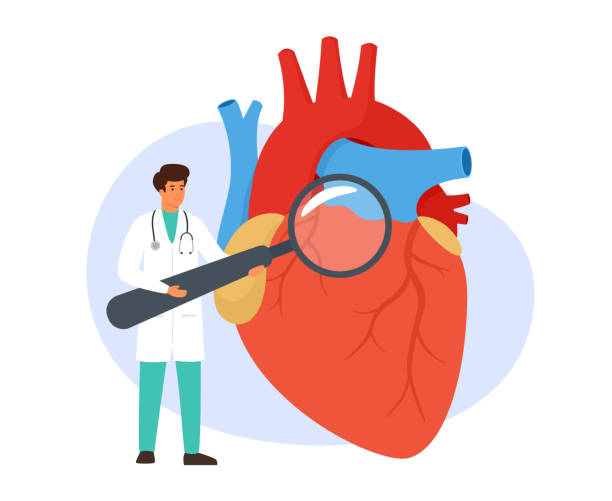

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset and printing first 5 rows
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In this chart

**Here's a brief description of each column in the heart disease dataset:**

1. **age**: Age of the patient (years).
2. **sex**: Gender of the patient (0 = Female, 1 = Male).
3. **cp**: Type of chest pain (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic).
4. **trestbps**: Resting blood pressure (mm Hg).
5. **chol**: Serum cholesterol level (mg/dl).
6. **fbs**: Fasting blood sugar (> 120 mg/dl indicates diabetes) (0 = <= 120 mg/dl, 1 = > 120 mg/dl).
7. **restecg**: Resting electrocardiographic results (0 = Normal, 1 = Abnormality, 2 = Probable or definite left ventricular hypertrophy).
8. **thalach**: Maximum heart rate achieved during exercise.
9. **exang**: Exercise-induced angina (0 = No, 1 = Yes).
10. **oldpeak**: ST depression induced by exercise relative to rest.
11. **slope**: Slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping).
12. **ca**: Number of major vessels colored by fluoroscopy (0-3).
13. **thal**: Thallium stress test result (0 = Normal, 1 = Fixed defect, 2 = Reversible defect).
14. **target**: Presence of heart disease (0 = No, 1 = Yes).

**These descriptions provide concise information about each column, including the type of data and possible values.**

In [3]:
#checking any null values are present or not
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

****

In [4]:
#statistical measure of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# getting sum info from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# cheking the shape of the dataset
df.shape

(1025, 14)

**Here we have 1025 rows and 14 columns**

In [7]:
# cheking the size of the dataset
df.size

14350

In [8]:
df_dup=df.duplicated().any()
print(df_dup)

True


**Here We have some duplicate vlaues so we are droping them**

In [9]:
df=df.drop_duplicates()
df_dup=df.duplicated().any()
print(df_dup)

False


In [10]:
df.shape

(302, 14)

**Here we successfully droped the duplicate vlaues and after that the shape of the data set is 302 rows and 14 columns**

<Axes: >

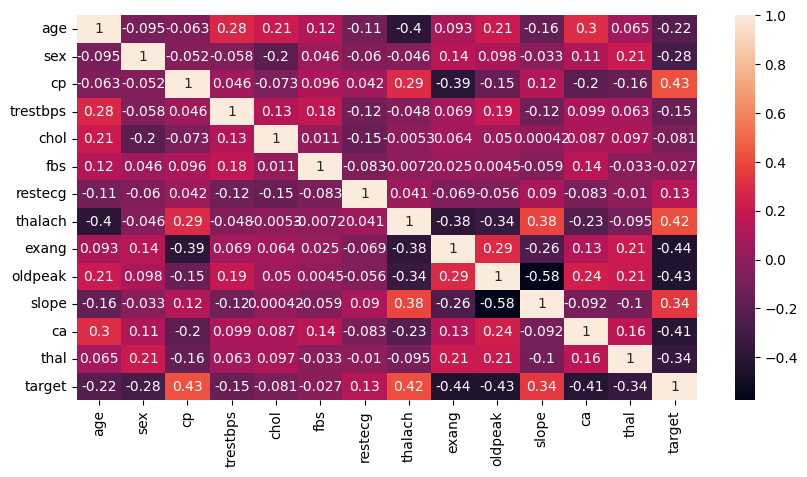

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

**So Here we can see in the target column we have cp, thalach and slope have positve correlation.**

In [12]:
# Checking distribution of How manay people having heart disease and who don't have any heart disease
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

**As we can see**

**1 --> 164 people having the heart disease**

**0 --> 138 people dose not have any heart disease**

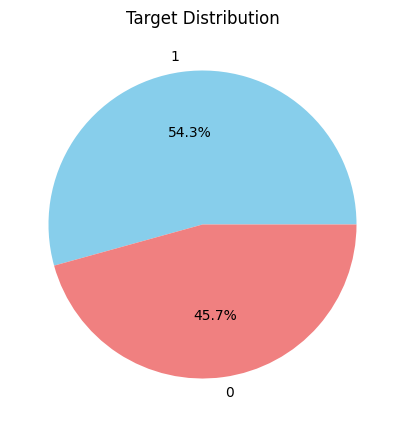

In [13]:
# Pie Chart of Target Distribution
plt.figure(figsize=(5,5))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Target Distribution')
plt.ylabel('')
plt.show()


**As we can see**

**1 --> 54.3% people having the heart disease**

**0 --> 45.7% people dose not have any heart disease**

In [14]:
# Finding How many male and female in the data
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

**Here we are checking how the sex column is ditributed means in that how many people are male and how many are female**

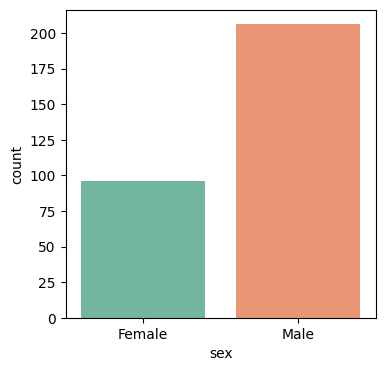

In [15]:
# visualizing the sex column
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=df,palette='Set2')
plt.xticks([1,0],['Male','Female'])
plt.show()

**So Here we have almost 206 peoples are male and 96 females**

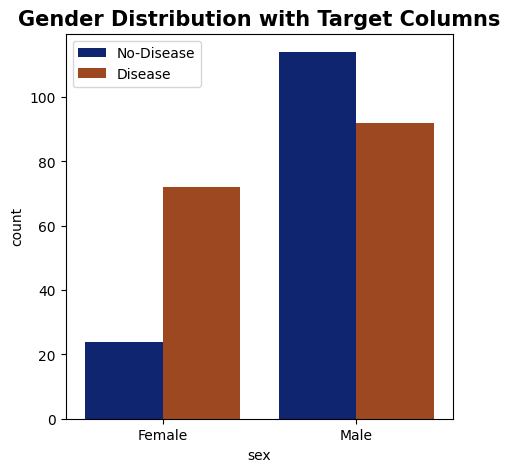

In [16]:
# Gender Distribution with Target Columns
plt.figure(figsize=(5,5))
sns.countplot(x='sex',hue='target',data=df,palette='dark')
plt.xticks([1,0],['Male','Female'])
plt.title('Gender Distribution with Target Columns',fontweight="bold",fontdict={'fontsize': 15})
plt.legend(labels=['No-Disease','Disease'])
plt.show()

**Here We just ploted a count plot to see gender vise heart disease so we can better understand**

In [17]:
# distribution of CP in dataset
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

**Here we have 4 values that represetnt the Chest Pain:**


1.  Value 0:- Typical Angina
2.  Value 1:- Atypical Angina
3.  Value 2:- Atypical Angina
4.  Value 3:- Asymptomatic



Text(0.5, 0.02, 'How cp("Chest Pain") is distributed in data')

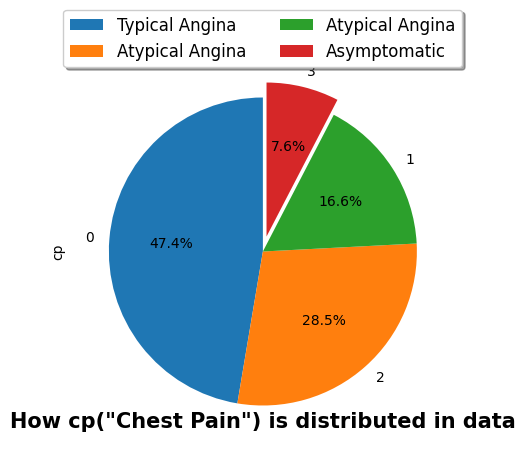

In [18]:
# Visualizing The Chest Pain with the help of pie chart

plt.figure(figsize=(5,5))
df.cp.value_counts().plot.pie(startangle=90,autopct='%1.1f%%',explode = (0, 0, 0, 0.1))

plt.rcParams['font.size'] = 12
plt.legend(labels=['Typical Angina','Atypical Angina','Atypical Angina','Asymptomatic'],loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=2)
plt.title('How cp("Chest Pain") is distributed in data',fontweight="bold",fontdict={'fontsize': 15},x=0.5, y=0.02, ha='center')

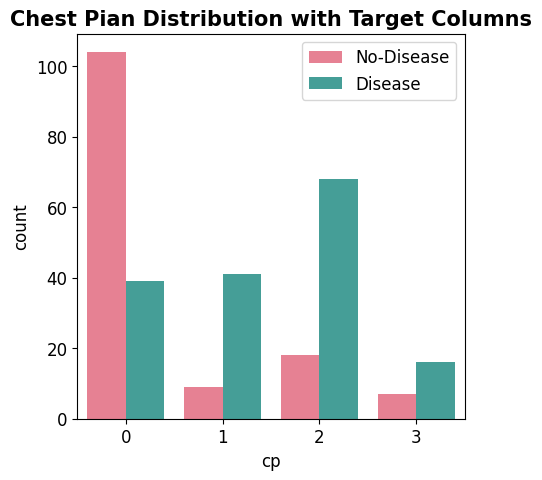

In [19]:
# Chest Pian Distribution with Target Columns

plt.figure(figsize=(5,5))
sns.countplot(x='cp',hue='target',data=df,palette='husl')
plt.legend(labels=['No-Disease','Disease'])
plt.title('Chest Pian Distribution with Target Columns',fontweight="bold",fontdict={'fontsize': 15})
plt.show()

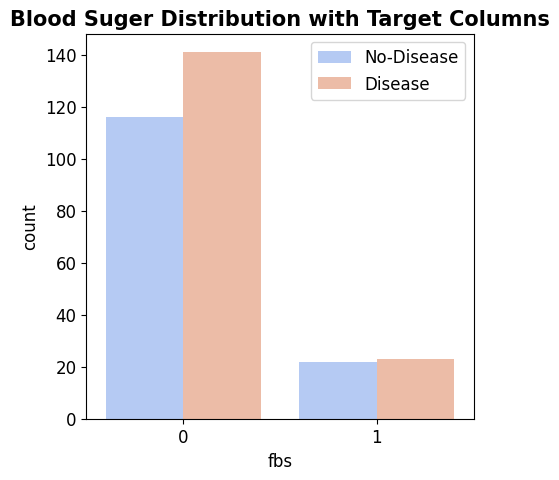

In [20]:
# Blood Suger Distribution with Target Columns

plt.figure(figsize=(5,5))
sns.countplot(x='fbs',hue='target',data=df, palette='coolwarm')
plt.legend(labels=['No-Disease','Disease'])
plt.title('Blood Suger Distribution with Target Columns',fontweight="bold",fontdict={'fontsize': 15})
plt.show()

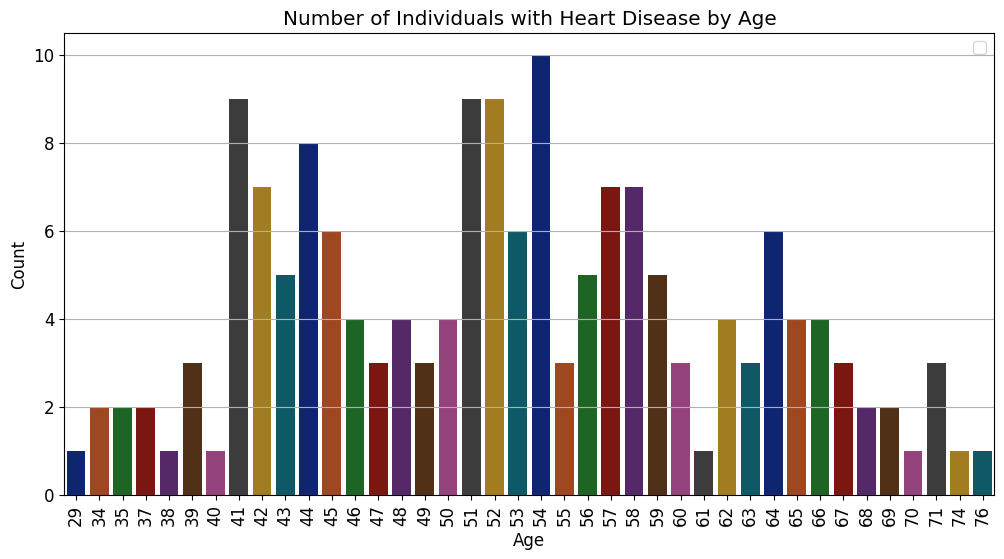

In [21]:
# Create a bar plot of Age for individuals with heart disease
heart_disease_data = df[df['target'] == 1]
age_counts = heart_disease_data['age'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='dark')
plt.title('Number of Individuals with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()

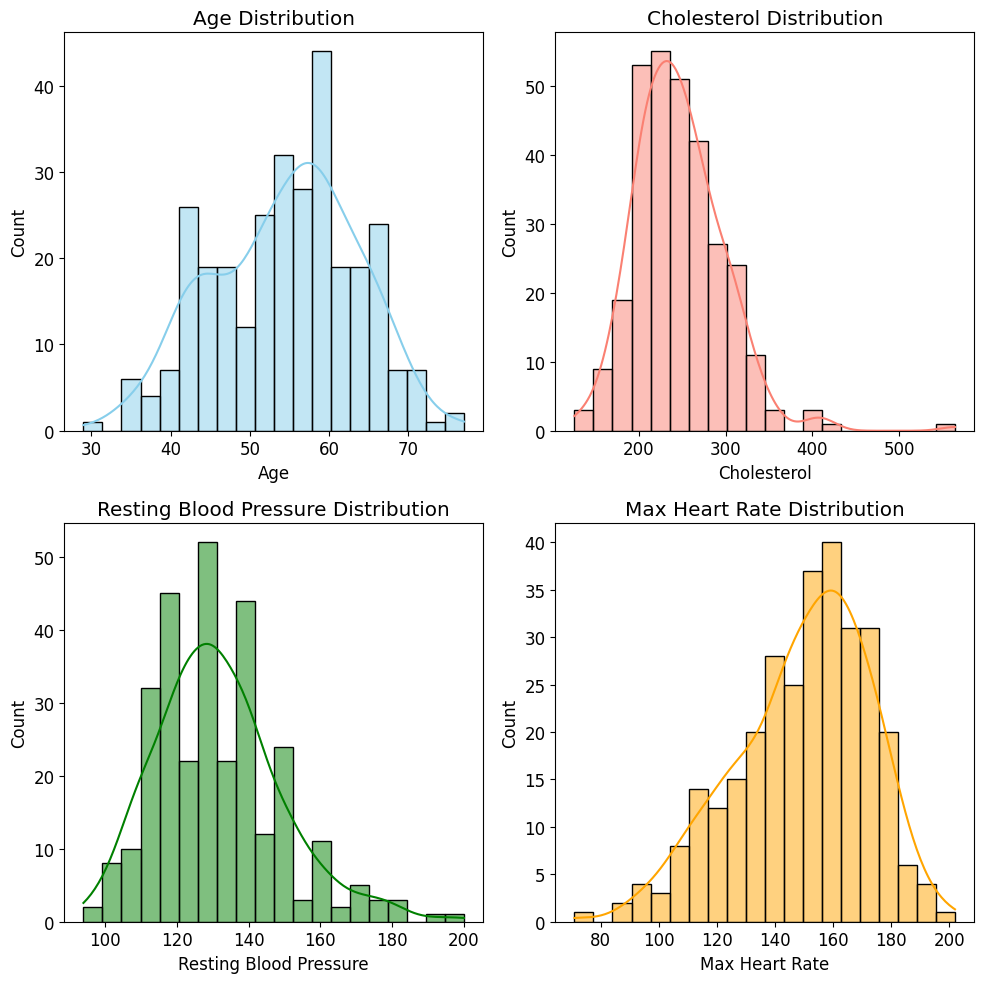

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Age distribution
sns.histplot(ax=axes[0, 0], x='age', data=df, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Cholesterol distribution
sns.histplot(ax=axes[0, 1], x='chol', data=df, bins=20, kde=True, color='salmon')
axes[0, 1].set_title('Cholesterol Distribution')
axes[0, 1].set_xlabel('Cholesterol')
axes[0, 1].set_ylabel('Count')

# Resting Blood Pressure distribution
sns.histplot(ax=axes[1, 0], x='trestbps', data=df, bins=20, kde=True, color='green')
axes[1, 0].set_title('Resting Blood Pressure Distribution')
axes[1, 0].set_xlabel('Resting Blood Pressure')
axes[1, 0].set_ylabel('Count')

# Max Heart Rate distribution
sns.histplot(ax=axes[1, 1], x='thalach', data=df, bins=20, kde=True, color='orange')
axes[1, 1].set_title('Max Heart Rate Distribution')
axes[1, 1].set_xlabel('Max Heart Rate')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<Figure size 600x400 with 0 Axes>

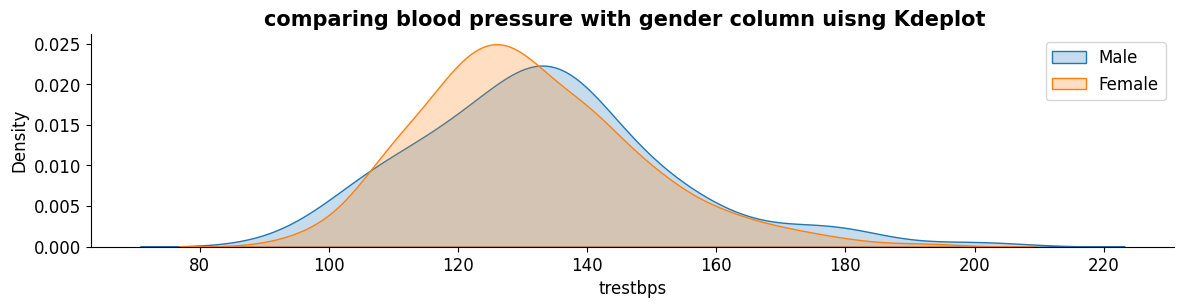

In [23]:
# compare blood pressure with sex column
plt.figure(figsize=(6,4))
g=sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.title('comparing blood pressure with gender column uisng Kdeplot  ',fontweight="bold",fontdict={'fontsize': 15})
plt.legend(labels=['Male','Female'])



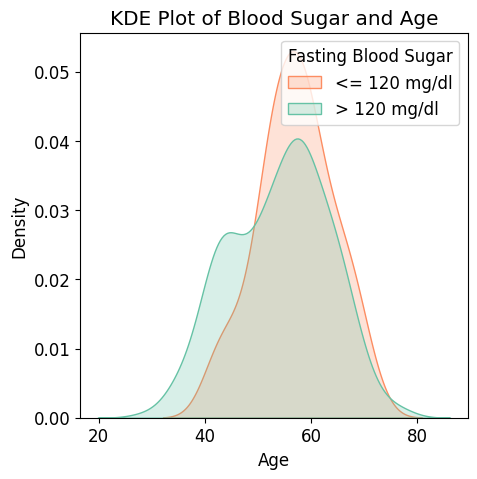

In [24]:
# KDE plot for blood sugar and age
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='age', hue='fbs', fill=True, common_norm=False, palette='Set2')
plt.title('KDE Plot of Blood Sugar and Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Fasting Blood Sugar', labels=['<= 120 mg/dl', '> 120 mg/dl'])
plt.show()


In [25]:
a=df.groupby('age')['cp'].sum().reset_index()
a=a.sort_values(by='cp',ascending=False)
a=a.head(10)
a


,age,cp
20,54,17
25,59,17
17,51,17
24,58,16
18,52,15
10,44,13
7,41,12
30,64,12
8,42,10
31,65,9


In [26]:
b=df.groupby('age')['chol'].sum().reset_index()
b=b.sort_values(by='chol',ascending=False)
b=b.head(5)
b

,age,chol
24,58,4836
23,57,4055
20,54,4053
25,59,3358
17,51,3104


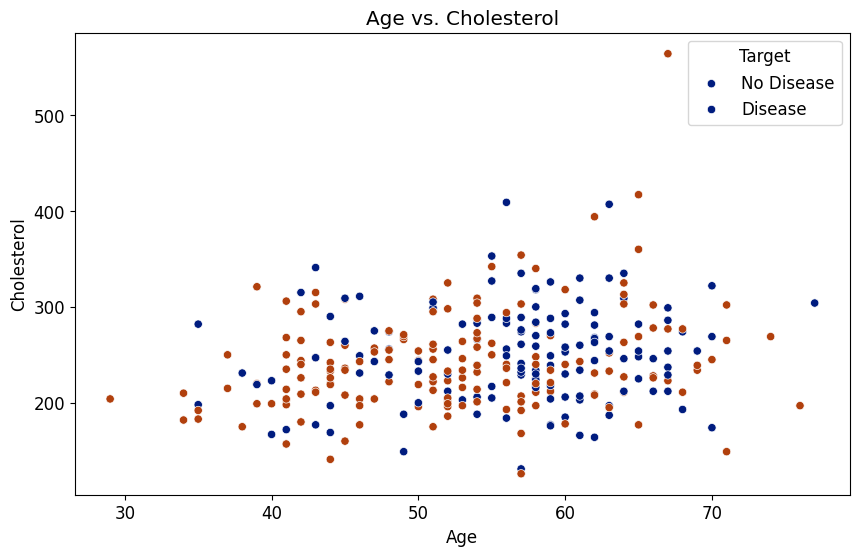

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', data=df, hue='target', palette='dark')
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()


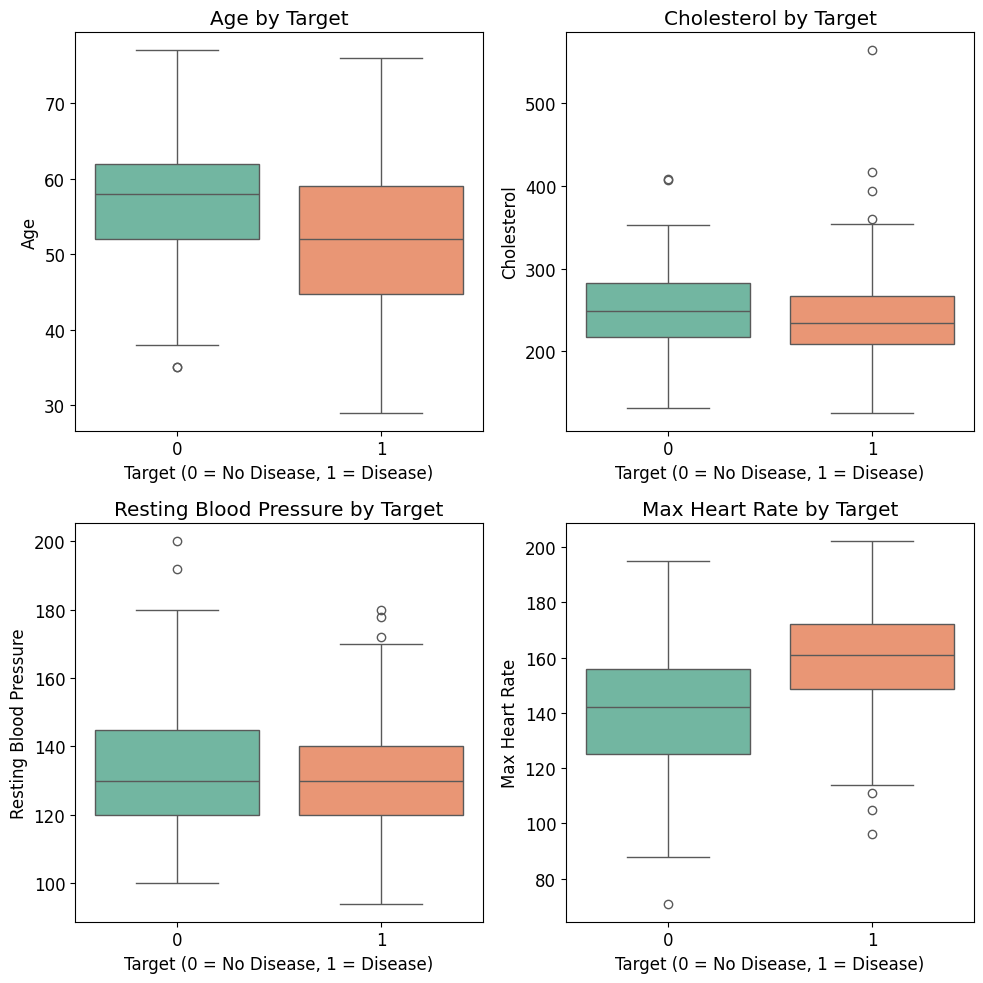

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Age vs. Target
sns.boxplot(ax=axes[0, 0], x='target', y='age', data=df, palette='Set2')
axes[0, 0].set_title('Age by Target')
axes[0, 0].set_xlabel('Target (0 = No Disease, 1 = Disease)')
axes[0, 0].set_ylabel('Age')

# Cholesterol vs. Target
sns.boxplot(ax=axes[0, 1], x='target', y='chol', data=df, palette='Set2')
axes[0, 1].set_title('Cholesterol by Target')
axes[0, 1].set_xlabel('Target (0 = No Disease, 1 = Disease)')
axes[0, 1].set_ylabel('Cholesterol')

# Resting Blood Pressure vs. Target
sns.boxplot(ax=axes[1, 0], x='target', y='trestbps', data=df, palette='Set2')
axes[1, 0].set_title('Resting Blood Pressure by Target')
axes[1, 0].set_xlabel('Target (0 = No Disease, 1 = Disease)')
axes[1, 0].set_ylabel('Resting Blood Pressure')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[1, 1], x='target', y='thalach', data=df, palette='Set2')
axes[1, 1].set_title('Max Heart Rate by Target')
axes[1, 1].set_xlabel('Target (0 = No Disease, 1 = Disease)')
axes[1, 1].set_ylabel('Max Heart Rate')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


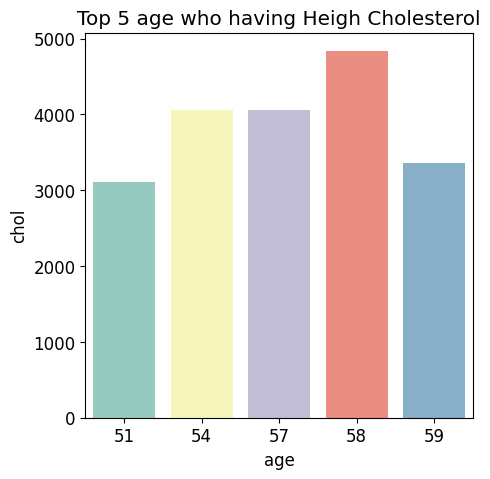

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x=b['age'],y=b['chol'],palette='Set3')
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Top 5 age who having Heigh Cholesterol')
plt.show()

**Spliting the Feature and Target Columns**

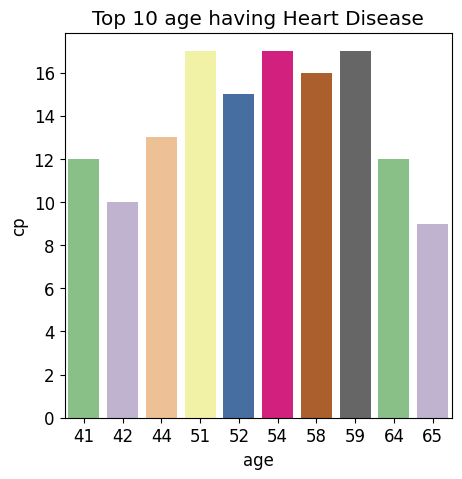

In [30]:
plt.figure(figsize=(5,5))
sns.barplot(x=a['age'],y=a['cp'],palette='Accent')
plt.xlabel('age')
plt.ylabel('cp')
plt.title('Top 10 age having Heart Disease')
plt.show()

# **Model Traning**

**Spliting the Data into Train Test Split**

In [31]:
x=df.drop('target',axis=1)
y=df['target']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(241, 13) (241,)
(61, 13) (61,)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**1. Logistic Regression**

In [34]:
logistic_reg =LogisticRegression()
logistic_reg .fit(x_train,y_train)
y_pred_lr =logistic_reg .predict(x_test)
accuracy=accuracy_score(y_test,y_pred_lr )
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8688524590163934


**2. Decision Tree**

In [35]:
decision_tree =DecisionTreeClassifier()
decision_tree .fit(x_train,y_train)
y_pred_dt =decision_tree .predict(x_test)
accuracy=accuracy_score(y_test,y_pred_dt )
print("Decision Tree Classifier Accuracy:", accuracy)

Decision Tree Classifier Accuracy: 0.7377049180327869


**3. Random Forest**

In [36]:
random_forest =RandomForestClassifier()
random_forest .fit(x_train,y_train)
y_pred_rf =random_forest .predict(x_test)
accuracy=accuracy_score(y_test,y_pred_rf )
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.7540983606557377


**4. Support Vector Machine (SVM)**

In [37]:
svm_model=SVC()
svm_model.fit(x_train,y_train)
y_pred_svm =svm_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_svm )
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.6721311475409836


**5. K-Nearest Neighbors (KNN)**

In [38]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
pred5=knn.predict(x_test)
y_pred_knn =accuracy_score(y_test,pred5)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.6721311475409836


**6. Naive Bayes**

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB

In [40]:
naive_bayes =GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred_nb =naive_bayes.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_nb )
print("Naive Bayes Accuracy::", accuracy)

Naive Bayes Accuracy:: 0.8524590163934426


In [41]:
bernoulli_nb =BernoulliNB()
bernoulli_nb .fit(x_train,y_train)
y_pred_bnb =bernoulli_nb .predict(x_test)
accuracy=accuracy_score(y_test,y_pred_bnb )
print("Bernoulli Naive Bayes Accuracy:", accuracy)

Bernoulli Naive Bayes Accuracy: 0.819672131147541


In [42]:
multinomial_nb =MultinomialNB()
multinomial_nb .fit(x_train,y_train)
y_pred_mnb =multinomial_nb .predict(x_test)
accuracy=accuracy_score(y_test,y_pred_mnb )
print("Multinomial Naive Bayes Accuracy:", accuracy)

Multinomial Naive Bayes Accuracy: 0.7377049180327869


# **ROC curve**

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [44]:
y_pred_proba = logistic_reg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [45]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.9195804195804196


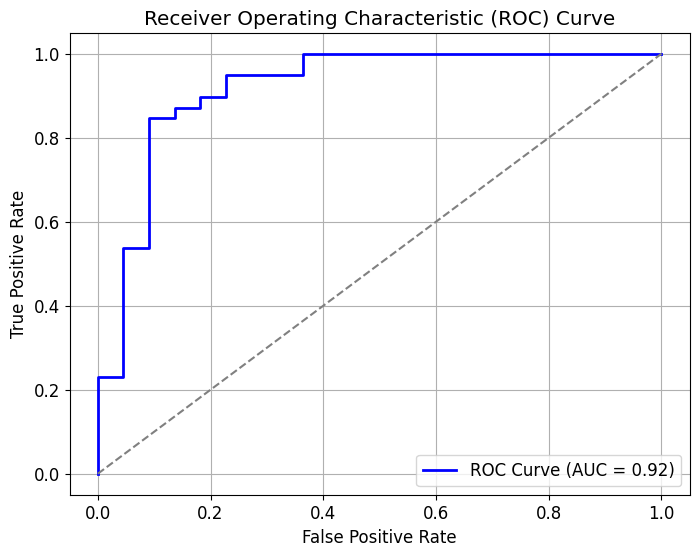

In [46]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Confusion Matrix**

In [47]:
# Confusion Matrix
y_pred = logistic_reg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[18  4]
 [ 4 35]]


In [48]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

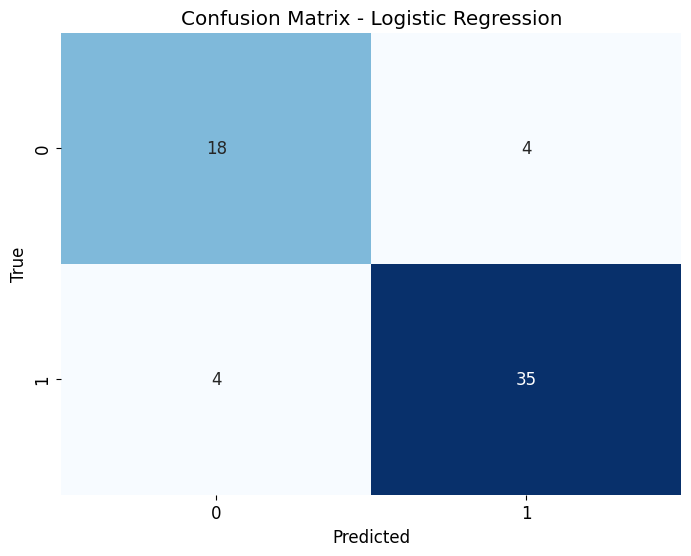

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Conclusion**

**Final Result**

**logistic regression accurately predicted heart disease with an accuracy of 0.8688524590163934 and demonstrated strong performance with an AUC score of 0.9195804195804196. The confusion matrix confirmed the model's ability to effectively classify heart disease cases. In conclusion, logistic regression proved to be a reliable method for heart disease prediction.**